# Even more Nuclear Physics equations

In [38]:
#Criticality
N_g = 200    # number of neutrons the generation
N_p = 80    # number of neutrons preceding generation

def k(N_g, N_p):
    k = N_p/N_g
    return(k)
k=k(N_g, N_p)
if k>1:
    print(k,'The reactor is in a very critical state')
elif k==1:
    print(k,'The reactor is in a critical state')
else:
    print(k,'The reactor is fine')

0.4 The reactor is fine


Microscopic cross section shows the probability of neutron interaction

In [30]:
#Cross section
num_rect = 3000    #number of reactions per nucleus per second
num_inc = 30    #number of incident neutrons per cm^2

def cross_section(num_rect,num_inc):
    sigma = num_rect/num_inc
    return(sigma)
cross_section(num_rect,num_inc)

100.0

In [219]:
#Variable declaration
t = 10**-5; # Thickness of Li(3,7), m
d = 500; # Density, Kg/m^3
N = 6.023e+026; # Number of  nuclei in 7-Kg of Li-7
M = 239 ; # Molar mass of U239

def cross_section2(t,d,N,M):
    n = (d*N*t)/M; # Number of Li(3,7) nuclei/area
    N_p = 10**8; # Number of neutron produced/s
    N_0 = 10**13; # Number of incident particle striking/unit area of target
    C_s = N_p/(N_0*n*(10**(-28))); #  Cross section, b
    return(C_s)
cross_section2(t,d,N,M)

7.936244396480158

In [34]:
from scipy.constants import e
from numpy import pi
#Information used with cross section
N_a = 1000    #amount of atoms density
N = 5    #number of neutrons
I_0 = 1000000    #neutron beam intensity
dx = 0.001    #thiccness of the foil layer
C = 30    #number of neutron interactions per square cm per second
x = 0.005
r = 7    #radius of the foil

def total_cross(N_a, I_0, C, num_inc, dx, x, N, r):
    sigma = (pi*(r**2))/100    #in barns
    sigma_t = C / (N_a*I_0)    #total cross-section
    I_x = I_0*(e**((-1*N_a)*sigma*x))    #macroscopic cross section
    neg_dI = N*sigma*I_x*dx
    dR = sigma_t*I_0*N*dx    # total reaction rate in dx
    Lambda = 1/(sigma_t)    #mean free path
    print('The total microscopic cross section is',sigma_t)
    print('The macroscopic cross section is',I_x)
    print('The total reaction rate in dx was:',dR)
    print('The mean free path is', Lambda)
total_cross(N_a, I_0, C, num_inc, dx, x, N, r)

The total microscopic cross section is 3e-08
The macroscopic cross section is 4.629159931760415e+150
The total reaction rate in dx was: 0.00015
The mean free path is 33333333.333333336


How a nuclear reactor works:<br>
The fuel (uranium) is placed into metal tubes called fuel rods. Then the rods are placed under water and the water is a moderator and coolant. The moderator slows down the neutrons to make more fission reactions happen. Heat by the fission makes steam which turns a turbine which makes energy.

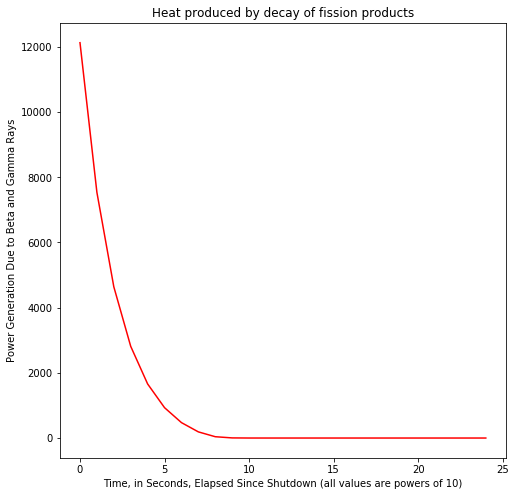

In [209]:
import numpy as np
import matplotlib.pyplot as plt
x = []
y = []
P_o = 200000
t_o = 10**8
for i in range(25):
    t = 10**i
    Pd_t = 0.0622*P_o*((t**-0.2)-((t_o + t)**-0.2))
    x.append(i)
    y.append(Pd_t)

plt.title('Heat produced by decay of fission products') 
plt.xlabel('Time, in Seconds, Elapsed Since Shutdown (all values are powers of 10)') 
plt.ylabel('Power Generation Due to Beta and Gamma Rays') 
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(x, y, color='red')
plt.show()

In [215]:
from numpy import log as ln

A = 238    #mass of the atom
E1 = 90    #energy of neutron before impact
scatteringAngle = 45    #angle of scattering

def E2(A,E1,scatteringAngle):
    if scatteringAngle==0:
        print('There was no collision')
    else:
        E2 = E1*((A**2)+(2*A*math.cos(scatteringAngle)+1)/((A+1)**2))
        alpha = ((A-1)/(A+1))**2
        P_E1_E2 = 1/((1-alpha)*E1)
        Net_Quantity = 2/(A+(2/3))    #only when A > 10
        N = ln(E1/E2)/Net_Quantity
        print(E2,'is the energy of the neutron after scattering')
        print(P_E1_E2*100, 'is the probability that E2 will have an energy in post collision energy range')
        print(int(N)*-1, 'is the average # of collisions of neutron to slow down to E2')
E2(A,E1,scatteringAngle)

5097960.395560197 is the energy of the neutron after scattering
66.66783380018661 is the probability that E2 will have an energy in post collision energy range
1306 is the average # of collisions of neutron to slow down to E2


C:\Users\Wallach Kids\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Wallach Kids\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


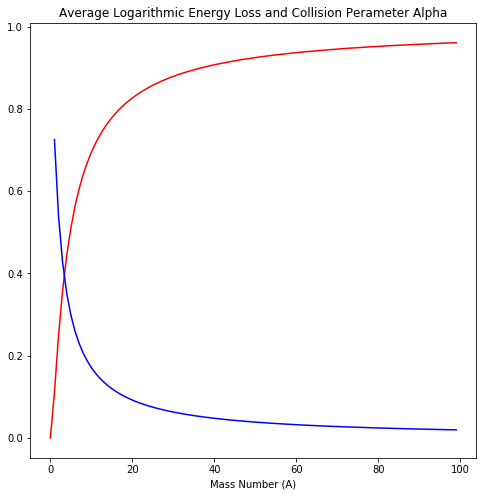

In [322]:
y1 = []
y2 = []
A=1
for i in range(100):
    alpha = ((A-1)/(A+1))**2
    y1.append(alpha)
    Net_Quant = 1+(alpha/(1-alpha))*ln(alpha)
    y2.append(Net_Quant)
    A+=1
plt.title('Average Logarithmic Energy Loss and Collision Perameter Alpha') 
plt.xlabel('Mass Number (A)')
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(y1, color = 'red')
plt.plot(y2, color = 'blue')
plt.show()

In [330]:
from scipy.constants import Planck,e
import numpy as np
from numpy import pi
import math
#Singlet scattering cross section
M = 1.6726    #mass of a nucleon
E = float(input())    #energy of the relative motion in a lab setting (MeV)
h = Planck/(2*pi)
k = ((M*E)/(h**2))**(1/2)    #wave number
a_s = -1*(2.43*(10**-12))    #scattering length in the singlet spin state
a = 1000    #scattering length
n = e**2/(h*E)
C= math.sqrt((2*pi*E)/(math.exp(2*pi/E)-1))
u_0 = C*(r-a)
v_0 = 1-(r/a)
r_0s = 0
singlet_scattering_cross_section = (4*pi)*((((a_s**-1)-((1/2)*r_0s*(k**2)))**2)+(k**2))**-1
print(singlet_scattering_cross_section)

0.01
8.355454791266818e-66


In [336]:
#Cross section of Proton-Neutron scattering cross section
E = float(input('Energy (below 8)'))
M = 1.6726    #mass of a nucleon
h = Planck/(2*pi)
k = ((M*E)/(h**2))**(1/2)    #wave number
R = 4.31*(10**-13)    #Decay Length/size of the Deutron
a_s = 2.378*(10**-12)    #scattering length in the singlet spin state
a = 0.1    #scattering length
n = e**2/(h*E)
C= math.sqrt((2*pi*E)/(math.exp(2*pi/E)-1))
u_0 = C*(r-a)
v_0 = 1-(r/a)
r_0 = 2*((((v_0**2)-(u_0**2))*10000)-(((v_0**2)-(u_0**2))*0))#I approximated infinity as 10000 (no I'm not an engineer)
proNeu_scattering = (4*pi)/(((k**2)+(R**-2))*(1-(r_0/R)+(((1/4)*r_0**2)*((k**2)+(R**-1)))))
print('The Neutron-Proton cross section is',proNeu_scattering)

Energy (below 8)0.01
The Neutron-Proton cross section is 2.450947228175513e-147


In [283]:
#zero energy neutrons cross section
sigma = 4*pi*R*((a-(r_0/(2*R)))**-2)
print(sigma)
#answer should be around 2.33*10^-24

2.2915278500099595e-51


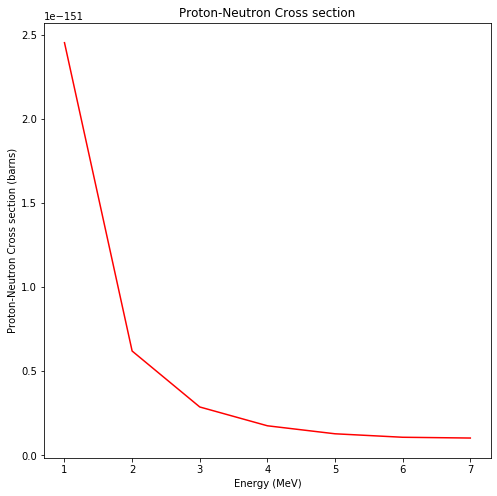

In [337]:
x = []
y = []
E = 1    #energy
for i in range(7):
    M = 1.6726    #mass of a nucleon
    h = Planck/(2*pi)
    k = ((M*E)/(h**2))**(1/2)    #wave number
    R = 4.31*(10**-13)    #Decay Length/size of the Deutron
    a_s = 2.378*(10**-12)    #scattering length in the singlet spin state
    a = 0.1    #scattering length
    n = e**2/(h*E)
    C= math.sqrt((2*pi*E)/(math.exp(2*pi/E)-1))
    u_0 = C*(r-a)
    v_0 = 1-(r/a)
    r_0 = 2*((((v_0**2)-(u_0**2))*10000)-(((v_0**2)-(u_0**2))*0))#I approximated infinity as 10000 (no I'm not an engineer)
    proNeu_scattering = (4*pi)/(((k**2)+(R**-2))*(1-(r_0/R)+(((1/4)*r_0**2)*((k**2)+(R**-1)))))
    y.append(proNeu_scattering)
    x.append(E)
    E += 1
plt.title('Proton-Neutron Cross section') 
plt.ylabel('Proton-Neutron Cross section (barns)') 
plt.xlabel('Energy (MeV)') 
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(x,y, color = 'red')
plt.show()

In [366]:
#parahydrogen cross section
f = 1.86*(10**-12)
sigma = (4/((3/2)**2))*4*pi*(f**2)
print('For a bound singlet state:',sigma)
f = -0.565*(10**-12)
sigma = (4/((3/2)**2))*4*pi*(f**2)
print('For a virtual singlet state:',sigma)

For a bound singlet state: 7.728820582655468e-23
For a virtual singlet state: 7.131554949988987e-24


In [375]:
v=10000000000000000
C2= (2*pi*(e/(h*v)))/(math.exp(2*pi/(e/(h*E))-1))    #Coulomb penetration factor
print(2*pi*(e/(h*v)))

0.9545838906187212
